In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from zipfile import ZipFile

with ZipFile("/content/drive/MyDrive/internship/vpods/ASHRAE/ashrae-energy-prediction.zip", 'r') as zObject:

    zObject.extractall(
        path="/content/drive/MyDrive/internship/vpods/ASHRAE")

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/train.csv')
test=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/test.csv')
building=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/building_metadata.csv')
weather_train=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/weather_train.csv')
weather_test=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/weather_test.csv')

In [ ]:
#train building
building_train=pd.merge(building,train,how='inner',on='building_id')

In [ ]:
building_train.isnull().sum()

site_id                 0
building_id             0
primary_use             0
square_feet             0
year_built       12127645
floor_count      16709167
meter                   0
timestamp               0
meter_reading           0
dtype: int64

In [ ]:
building_train.dropna(inplace=True)

In [ ]:
building_train.isnull().sum()

site_id          0
building_id      0
primary_use      0
square_feet      0
year_built       0
floor_count      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [ ]:
building_train.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
1103010,1,107,Education,97532,2005.0,10.0,0,2016-01-01 00:00:00,175.184
1103011,1,107,Education,97532,2005.0,10.0,0,2016-01-01 01:00:00,350.367
1103012,1,107,Education,97532,2005.0,10.0,0,2016-01-01 02:00:00,350.367
1103013,1,107,Education,97532,2005.0,10.0,0,2016-01-01 03:00:00,350.367
1103014,1,107,Education,97532,2005.0,10.0,0,2016-01-01 04:00:00,350.367


In [ ]:
building_train['site_id'].unique()

array([1, 4, 5, 7])

In [ ]:
weather_train.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
weather_train['site_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
weather_train.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [ ]:
weather_train.dropna(inplace=True)


In [ ]:
building_train_weather=pd.merge(building_train,weather_train,how='inner',on=['site_id','timestamp'])

In [ ]:
len(building_train_weather)

321728

In [ ]:
building_train_weather.to_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/building_train_weather.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
building_train_weather=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/building_train_weather.csv')

In [ ]:
building_train_weather.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
building_train_weather.head(5)

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,4,565,Education,15326,1954.0,2.0,0,2016-01-01 01:00:00,8.500,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
1,1,4,566,Education,2010,1957.0,1.0,0,2016-01-01 01:00:00,0.521,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
2,2,4,569,Education,86091,1964.0,8.0,0,2016-01-01 01:00:00,243.500,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3,3,4,570,Education,193202,1964.0,10.0,0,2016-01-01 01:00:00,79.488,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
4,4,4,571,Education,47954,1980.0,3.0,0,2016-01-01 01:00:00,16.750,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1


In [ ]:
building_train_weather.columns

Index(['Unnamed: 0', 'site_id', 'building_id', 'primary_use', 'square_feet',
       'year_built', 'floor_count', 'meter', 'timestamp', 'meter_reading',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [ ]:
building_train_weather.isnull().sum()

Unnamed: 0            0
site_id               0
building_id           0
primary_use           0
square_feet           0
year_built            0
floor_count           0
meter                 0
timestamp             0
meter_reading         0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [ ]:
cols=['building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed']
print("Cardinality: \n")
for i in cols:
  print(i)
  print("Number of unique categorical features: ",len(building_train_weather[i].unique()))
  print("feature: ",building_train_weather[i].unique())
  print("\n")

Cardinality: 

building_id
Number of unique categorical features:  89
feature:  [565 566 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584
 585 586 587 588 589 590 592 594 595 596 597 598 599 600 601 602 603 605
 606 608 609 610 611 612 614 615 616 617 618 619 620 622 623 624 625 626
 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 643 644 645
 646 648 649 650 651 652 653 654 655 593 613 647 607 568 567 621 591]


primary_use
Number of unique categorical features:  7
feature:  ['Education' 'Technology/science' 'Lodging/residential' 'Public services'
 'Entertainment/public assembly' 'Utility' 'Parking']


square_feet
Number of unique categorical features:  89
feature:  [ 15326   2010  86091 193202  47954  94175  23815  56343  33167  86465
 113589  71994   7781 104016  23012  14542 206054 137806 132394 166514
  53234  21866 305268   8516 120694 177281 270413  18474 189425  68701
  25996  44182  11910 238065  29063  51020  23432 124197 141461  30160
 128126  7705

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

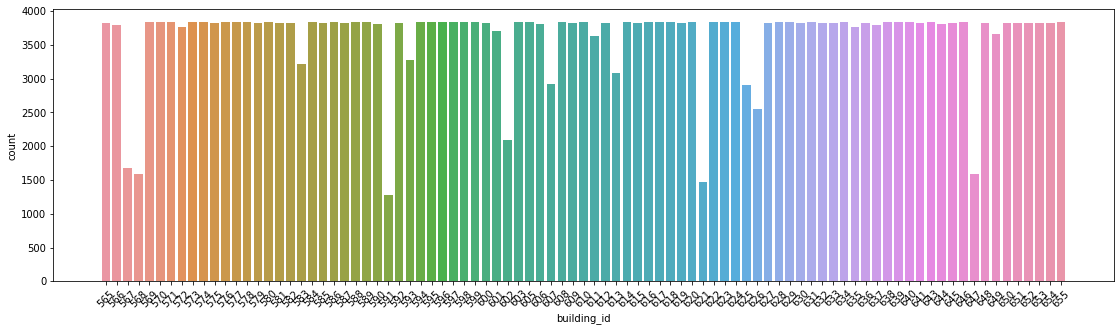

In [ ]:
plt.figure(figsize=(19,5))
sns.countplot(building_train_weather['building_id'])
plt.xticks(rotation = 45)
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

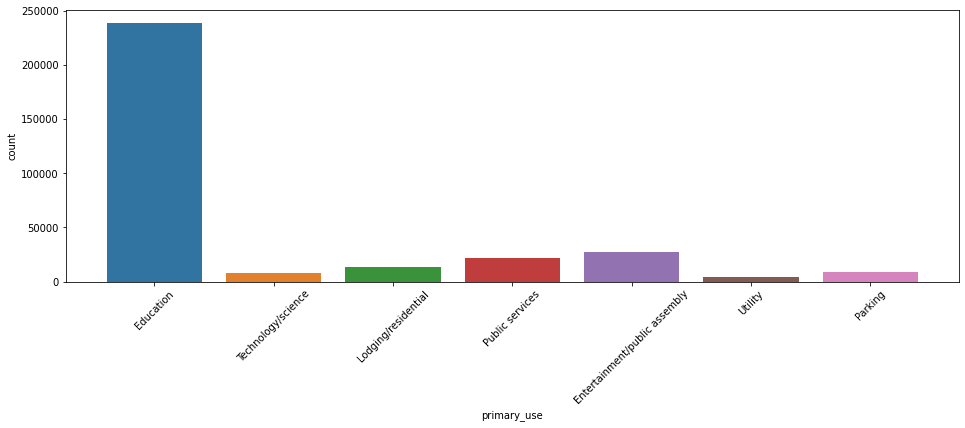

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(building_train_weather['primary_use'])
plt.xticks(rotation=45)
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

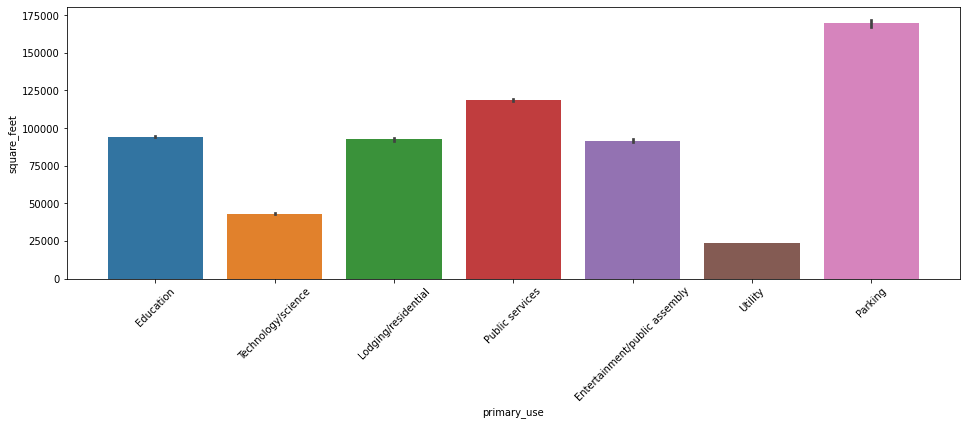

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(building_train_weather['primary_use'],building_train_weather['square_feet'])
plt.xticks(rotation=45)
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

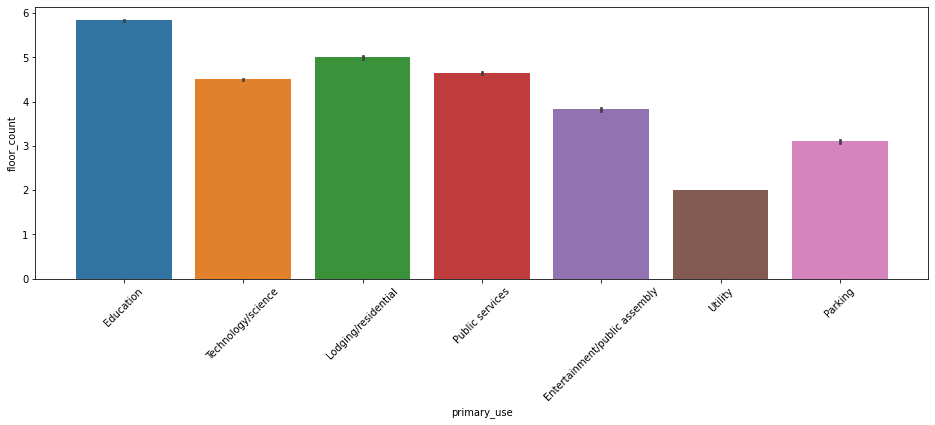

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(building_train_weather['primary_use'],building_train_weather['floor_count'])
plt.xticks(rotation=45)
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

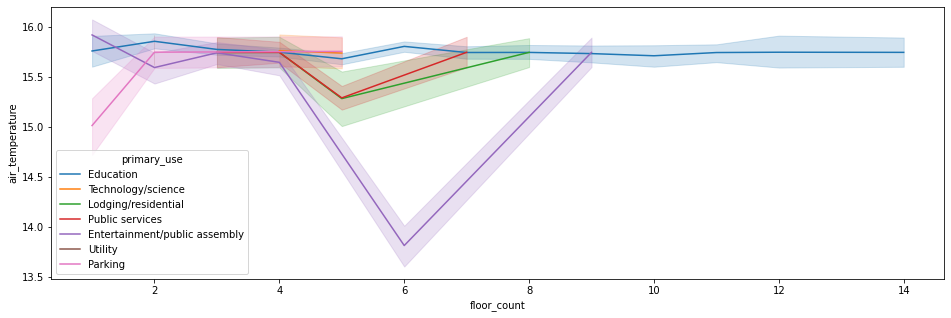

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['floor_count'],building_train_weather['air_temperature'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

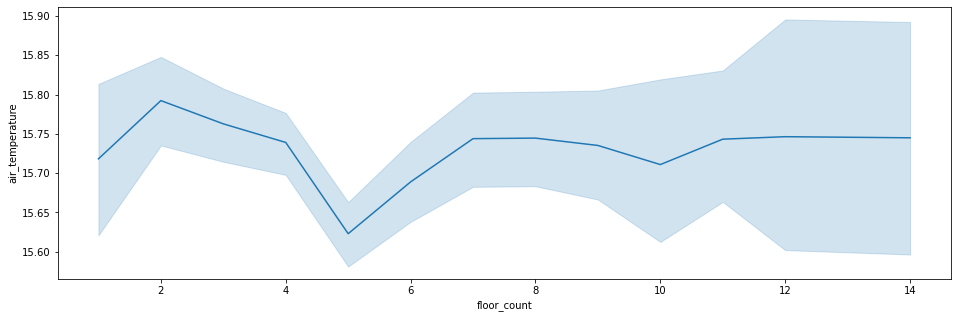

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['floor_count'],building_train_weather['air_temperature'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

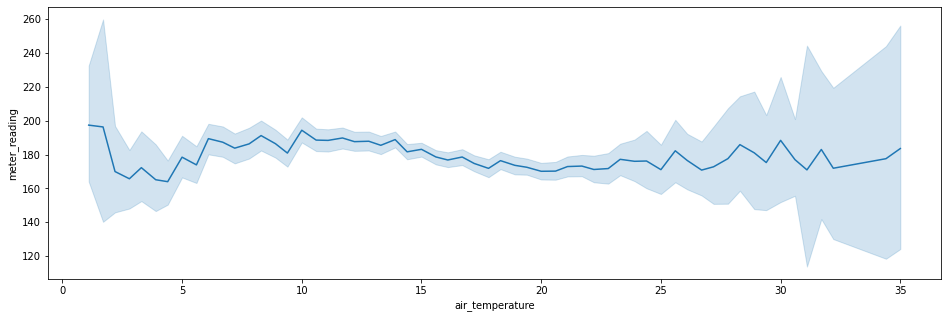

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['air_temperature'],building_train_weather['meter_reading'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

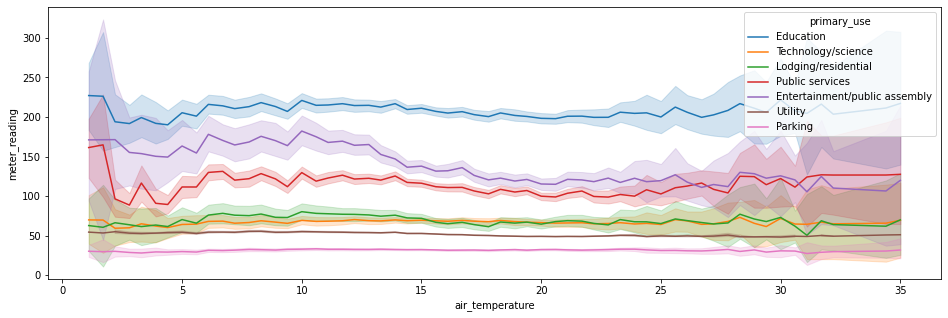

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['air_temperature'],building_train_weather['meter_reading'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

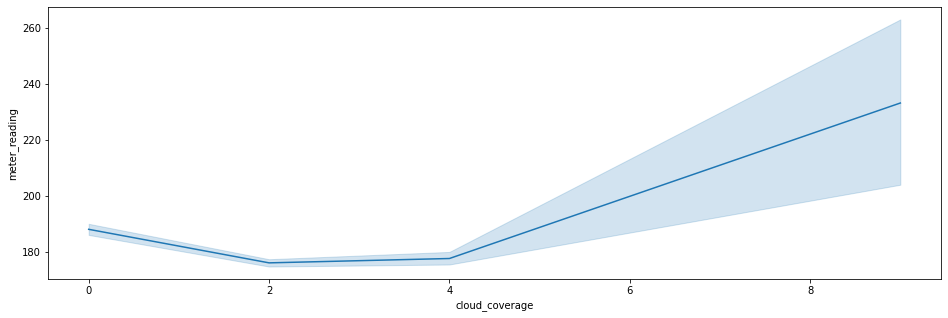

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['cloud_coverage'],building_train_weather['meter_reading'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

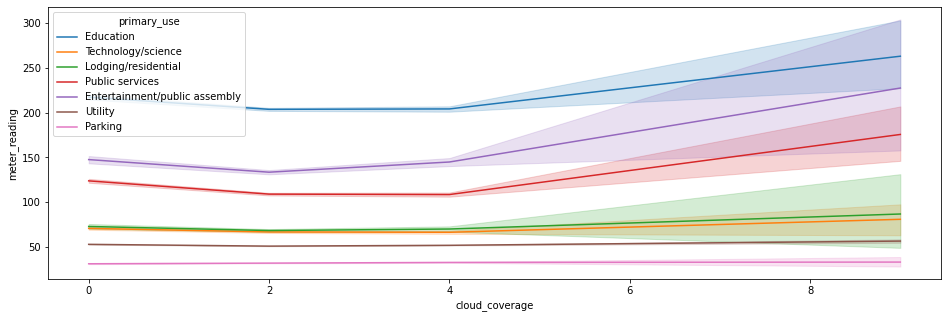

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['cloud_coverage'],building_train_weather['meter_reading'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

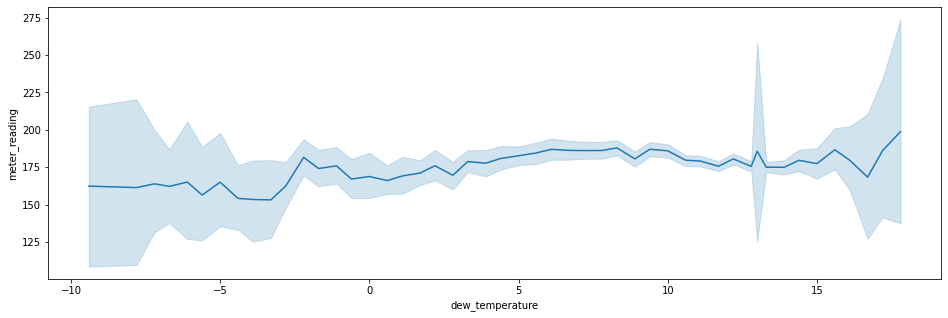

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['dew_temperature'],building_train_weather['meter_reading'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

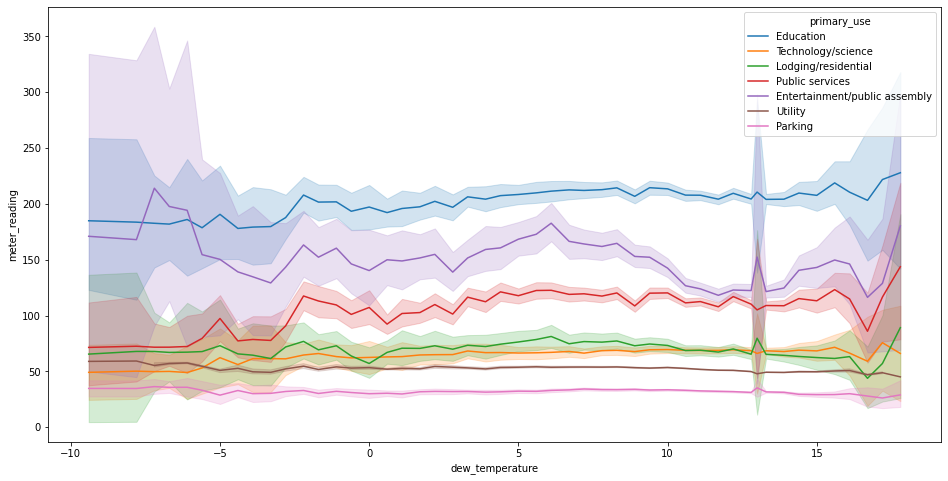

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(building_train_weather['dew_temperature'],building_train_weather['meter_reading'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

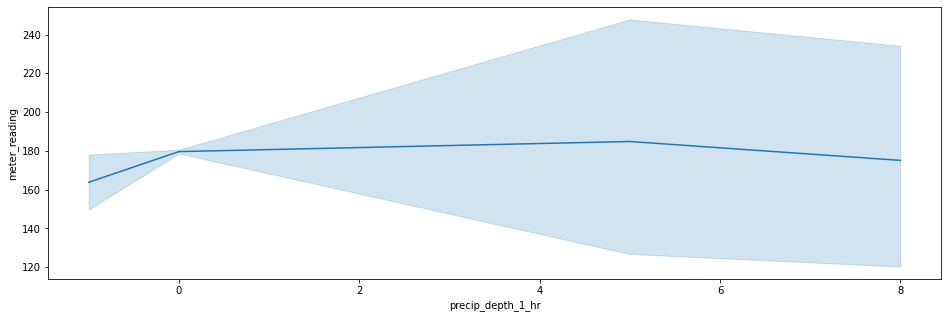

In [ ]:

plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['precip_depth_1_hr'],building_train_weather['meter_reading'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

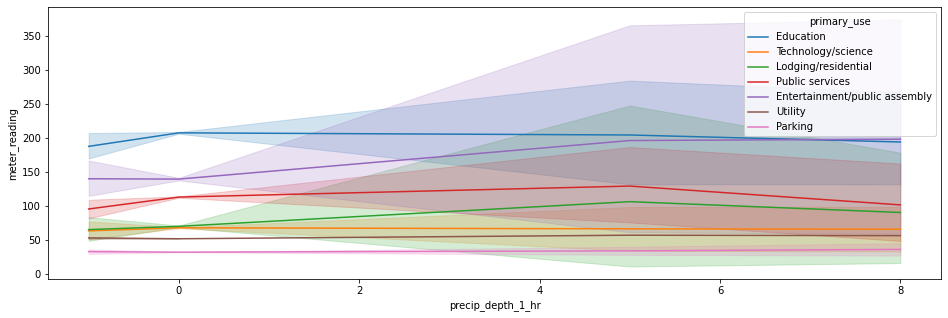

In [ ]:

plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['precip_depth_1_hr'],building_train_weather['meter_reading'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

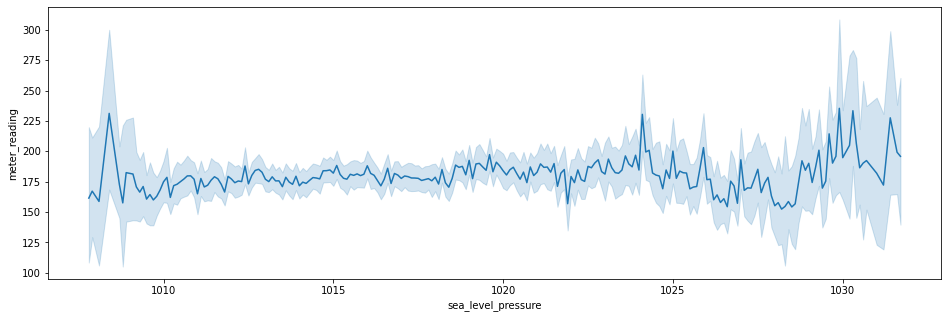

In [ ]:

plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['sea_level_pressure'],building_train_weather['meter_reading'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

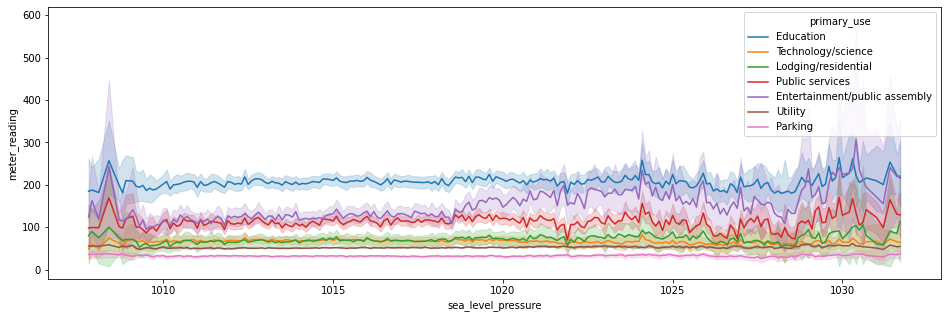

In [ ]:

plt.figure(figsize=(16,9))
sns.lineplot(building_train_weather['sea_level_pressure'],building_train_weather['meter_reading'],hue=building_train_weather['primary_use'])
plt.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

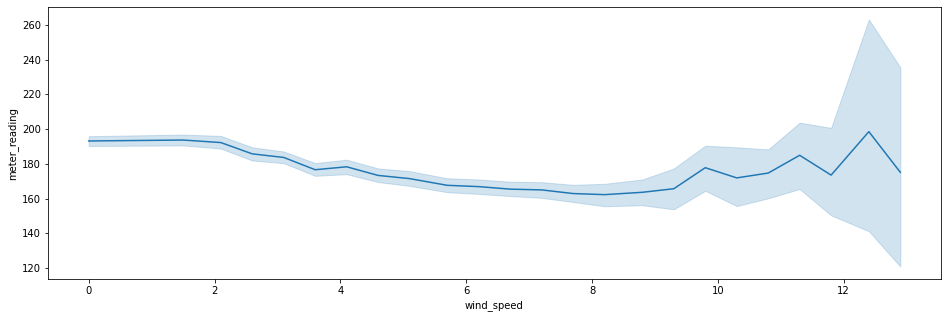

In [ ]:


plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['wind_speed'],building_train_weather['meter_reading'])
plt.plot()

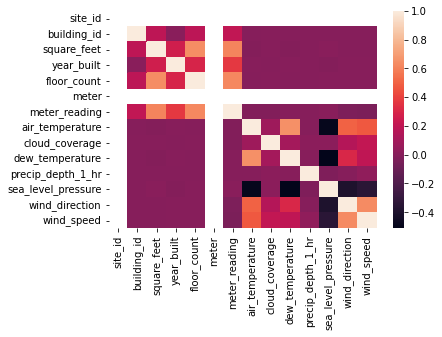

In [ ]:
sns.heatmap(building_train_weather.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

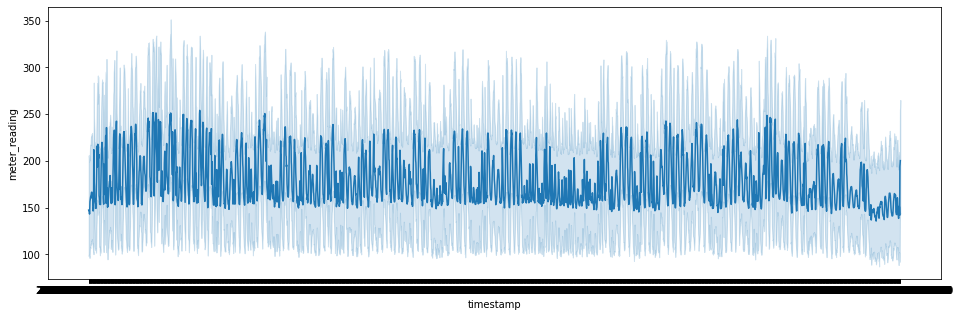

In [ ]:


plt.figure(figsize=(16,5))
sns.lineplot(building_train_weather['timestamp'],building_train_weather['meter_reading'])
plt.plot()

In [ ]:
df=building_train_weather.copy()

df.drop('timestamp',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_use']=le.fit_transform(df['primary_use'])


In [ ]:
df=df.iloc[:5000,:]

### detecting outliers

#### Elliptic Envelope

In [ ]:
#detecting outliers
#Elliptic Envelope

from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)
pred = elpenv.fit_predict(df)


In [ ]:
df['anomaly']=pred
df_a=df[df['anomaly']==-1]
df_n=df[df['anomaly']==1]
print(len(df_a))

125


[]

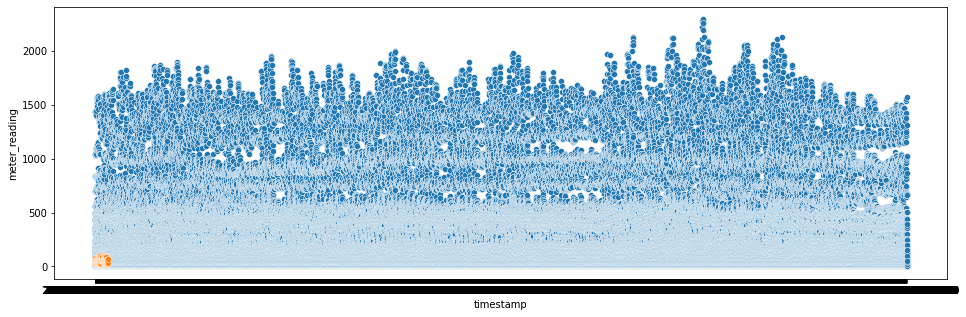

In [ ]:
plt.figure(figsize=(16,5))
sns.scatterplot(building_train_weather['timestamp'],building_train_weather['meter_reading'])
sns.scatterplot(building_train_weather['timestamp'],df_a['meter_reading'],palette=['r'])
plt.plot()

500


[]

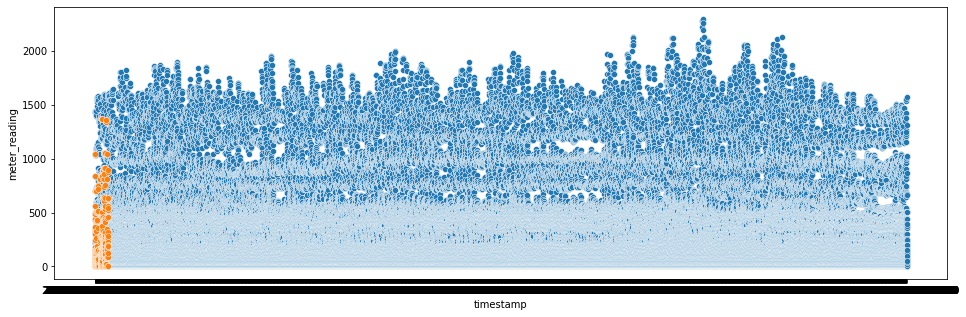

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = lof.fit_predict(df)

df['anomaly']=pred
df_a=df[df['anomaly']==-1]
df_n=df[df['anomaly']==1]
print(len(df_a))

plt.figure(figsize=(16,5))
sns.scatterplot(building_train_weather['timestamp'],building_train_weather['meter_reading'])
sns.scatterplot(building_train_weather['timestamp'],df_a['meter_reading'],palette=['r'])
plt.plot()

500


[]

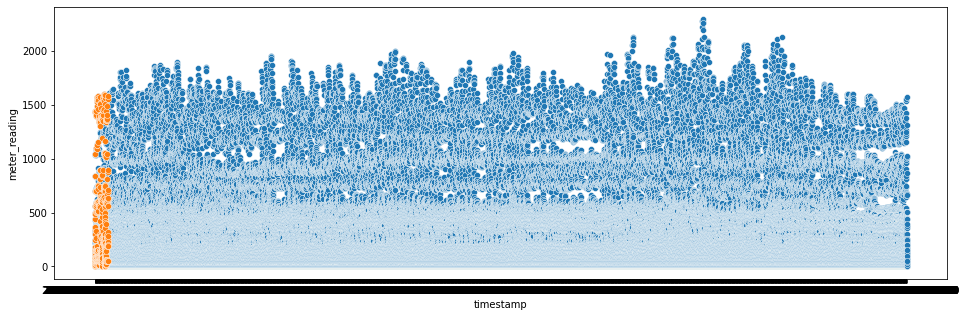

In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50,max_samples='auto',contamination=float(0.1),max_features=1.0)
pred=model.fit_predict(df)
df['anomaly']=pred
df_a=df[df['anomaly']==-1]
df_n=df[df['anomaly']==1]
print(len(df_a))

plt.figure(figsize=(16,5))
sns.scatterplot(building_train_weather['timestamp'],building_train_weather['meter_reading'])
sns.scatterplot(building_train_weather['timestamp'],df_a['meter_reading'],palette=['r'])
plt.plot()

site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

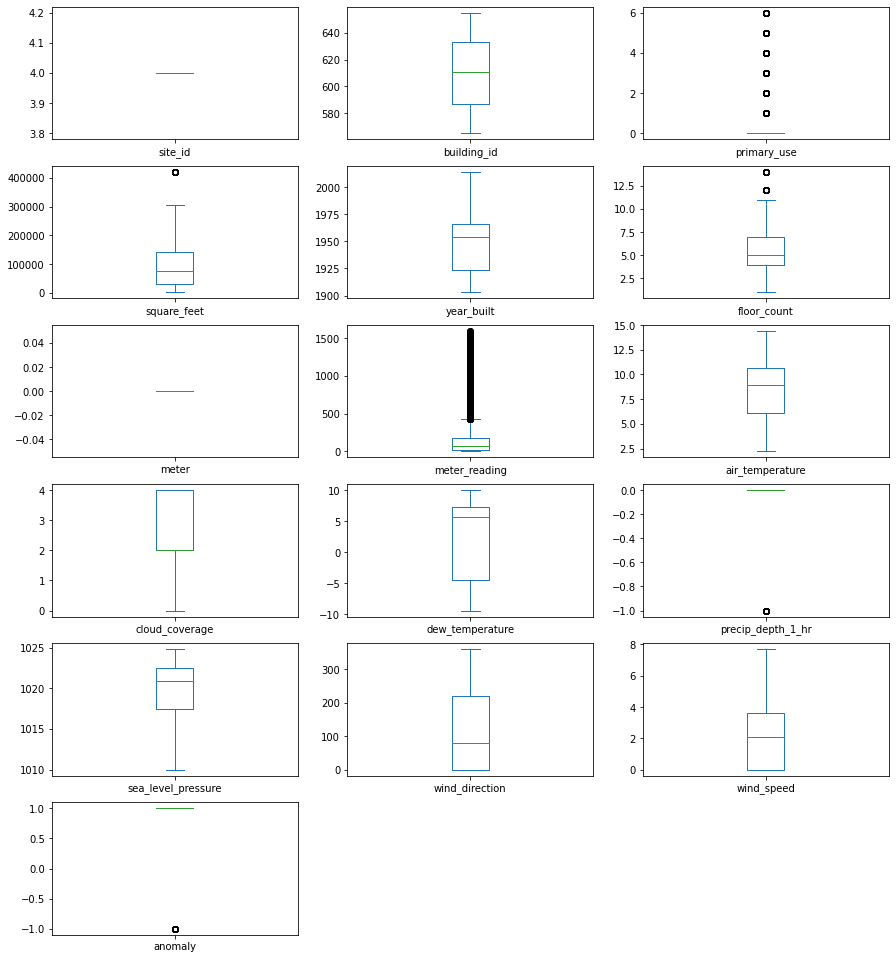

In [ ]:
df.plot(kind='box',layout=(7,3),subplots=True,  figsize=(15,20))

In [ ]:
df.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed', 'anomaly'],
      dtype='object')

In [ ]:
import numpy as np
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df[col]=np.clip(df[col],lower_bound,upper_bound)
    return df

def out_all(df,col_list):
    for c in col_list:
        df=remove_outliers(df,c)
    return df
    

In [ ]:
col=['square_feet','floor_count','meter_reading']
df=out_all(df,col)

site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

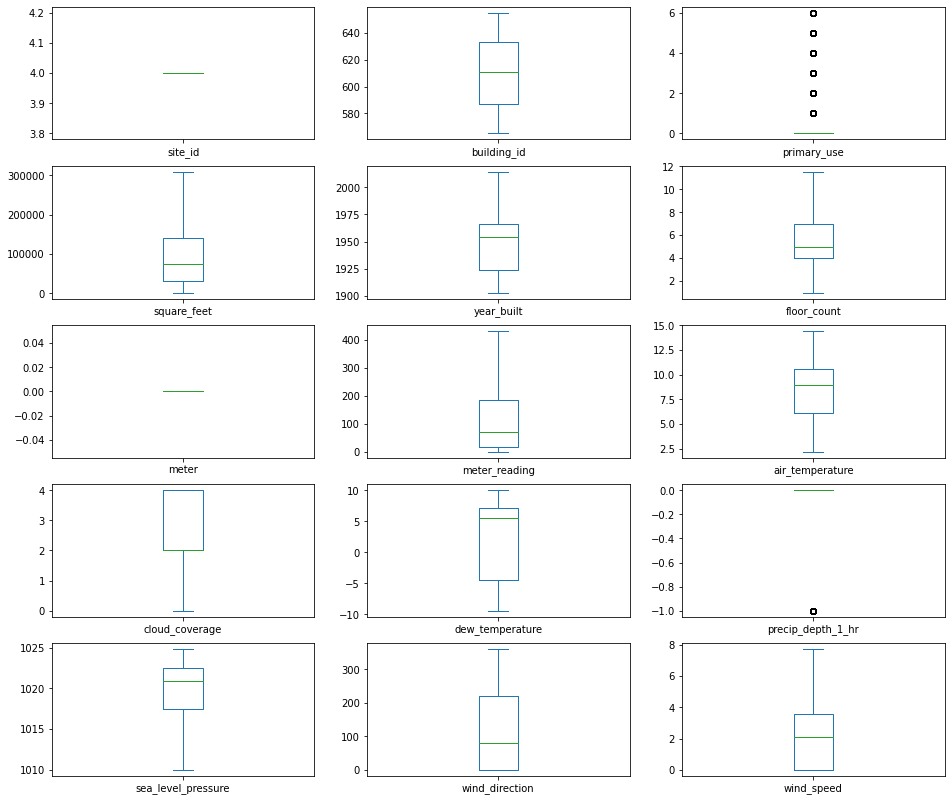

In [ ]:
df.plot(kind='box',layout=(7,3),subplots=True,figsize=(16,20))

Number of anoalies predicted:  32173


[]

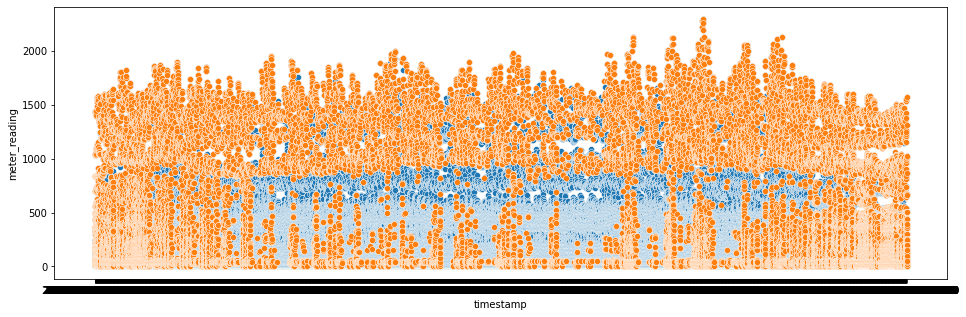

In [ ]:
df=building_train_weather.copy()
df.drop('timestamp',axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_use']=le.fit_transform(df['primary_use'])
model=IsolationForest(n_estimators=50,max_samples='auto',contamination=float(0.1),max_features=1.0)
pred=model.fit_predict(df)
df['anomaly']=pred
df_a=df[df['anomaly']==-1]
df_n=df[df['anomaly']==1]
print("Number of anoalies predicted: ",len(df_a))

plt.figure(figsize=(16,5))
sns.scatterplot(building_train_weather['timestamp'],building_train_weather['meter_reading'])
sns.scatterplot(building_train_weather['timestamp'],df_a['meter_reading'],palette=['r'])
plt.plot()

site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

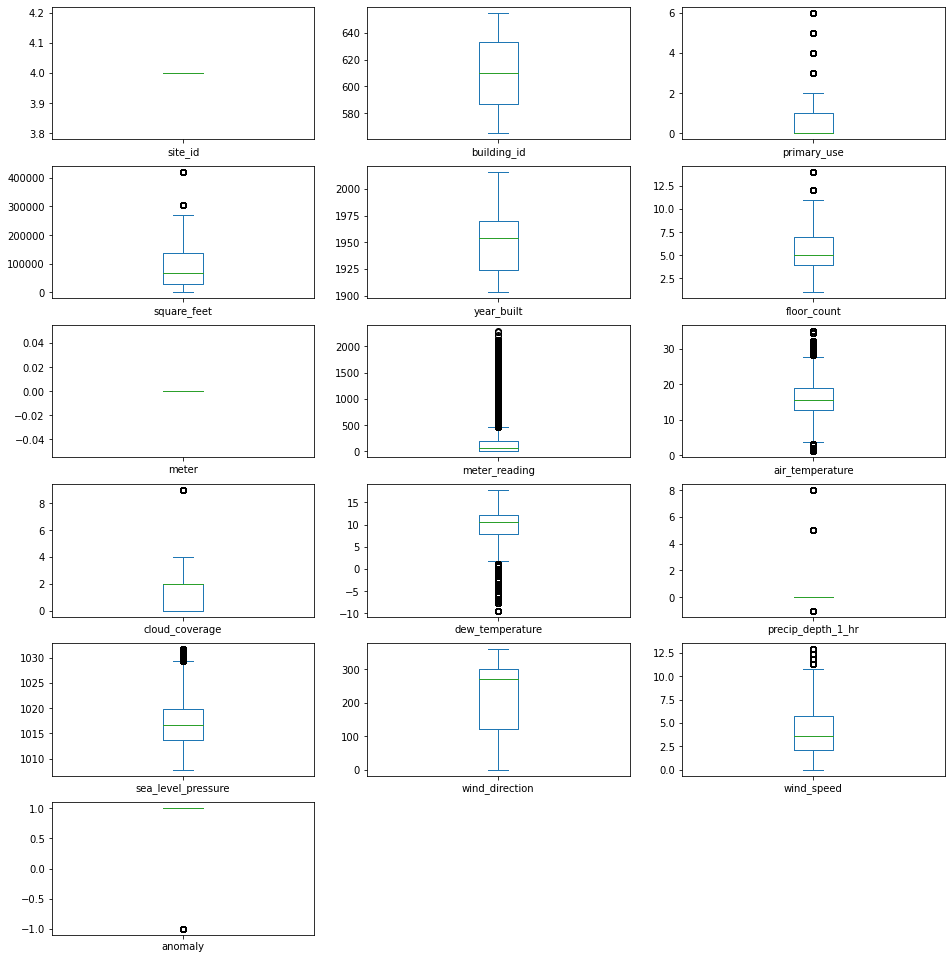

In [ ]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(16,20))

site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

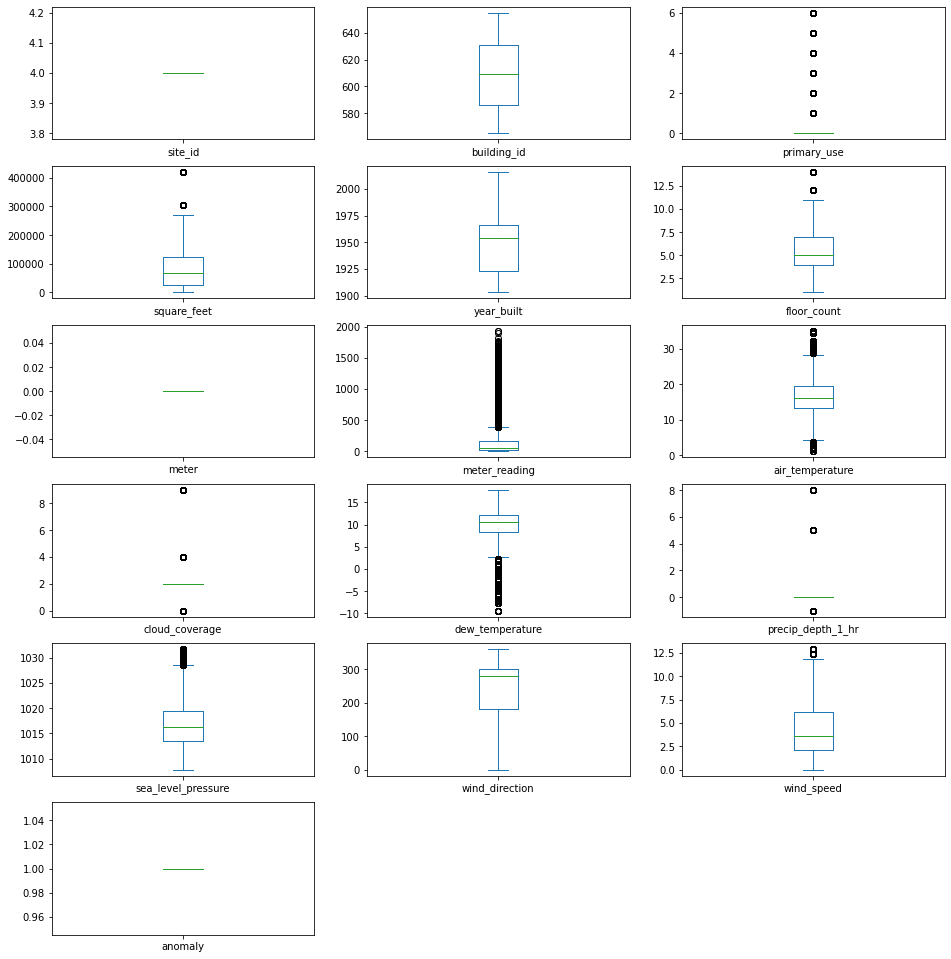

In [ ]:
df_n.plot(kind='box',subplots=True,layout=(7,3),figsize=(16,20))

In [ ]:
building_train_weather.describe()

,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,321728.0,321728.000000,321728.000000,321728.000000,321728.000000,321728.0,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000,321728.000000
mean,4.0,610.088559,95639.173774,1953.484129,5.399120,0.0,179.570860,15.724291,1.850694,9.504836,-0.000603,1017.122623,215.193020,3.881576
std,0.0,26.286334,85362.315842,31.981264,2.689169,0.0,286.361571,4.841540,1.354687,4.047034,0.162522,4.586045,116.222353,2.600554
min,4.0,565.000000,387.000000,1903.000000,1.000000,0.0,0.000000,1.100000,0.000000,-9.400000,-1.000000,1007.800000,0.000000,0.000000
25%,4.0,587.000000,29063.000000,1924.000000,4.000000,0.0,17.829325,12.800000,0.000000,7.800000,0.000000,1013.600000,120.000000,2.100000
50%,4.0,610.000000,68701.000000,1954.000000,5.000000,0.0,68.983700,15.600000,2.000000,10.600000,0.000000,1016.600000,270.000000,3.600000
75%,4.0,633.000000,137806.000000,1970.000000,7.000000,0.0,195.000000,18.900000,2.000000,12.200000,0.000000,1019.900000,300.000000,5.700000
max,4.0,655.000000,420885.000000,2016.000000,14.000000,0.0,2293.880000,35.000000,9.000000,17.800000,8.000000,1031.700000,360.000000,12.900000


In [ ]:
building_train_weather['year_built'].var()

1022.8012661821255

In [ ]:
def aggregate_values(df,cols):
  for col in cols:
    print()
    print(col)
    print("Mean: ",df[col].mean())
    print("Median: ",df[col].median())
    print("Mode: ",df[col].mode())
    print("STD: ",df[col].std())
    print("Variance: ",df[col].var())
    print("Min: ",df[col].min())
    print("Max: ",df[col].max())
    print()
    sns.displot(df[col])
    plt.show()

def aagregate_dict(df,cols):
  agg_dict={
      
  }
  for col in cols:


square_feet
Mean:  95639.17377411976
Median:  68701.0
Mode:  0       4000
1       7900
2      14524
3      18474
4      21866
5      23533
6      23815
7      25996
8      29063
9      30160
10     36180
11     40706
12     40835
13     46204
14     47954
15     49388
16     51020
17     56343
18     58733
19     68701
20     71994
21     86091
22     86465
23    104016
24    110919
25    113589
26    117814
27    123612
28    124197
29    137806
30    148032
31    166514
32    177281
33    182943
34    185200
35    189425
36    193202
37    220703
38    222434
39    270413
40    305268
dtype: int64
STD:  85362.31584228577
Variance:  7286724965.958151
Min:  387
Max:  420885



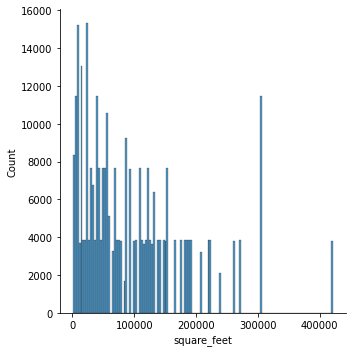

year_built
Mean:  1953.4841294509647
Median:  1954.0
Mode:  0    1964.0
dtype: float64
STD:  31.981264299306954
Variance:  1022.8012661821255
Min:  1903.0
Max:  2016.0



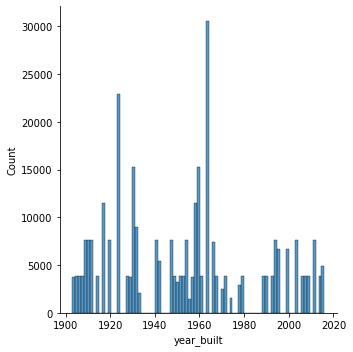

floor_count
Mean:  5.399119753332007
Median:  5.0
Mode:  0    4.0
dtype: float64
STD:  2.689168557593504
Variance:  7.231627531149526
Min:  1.0
Max:  14.0



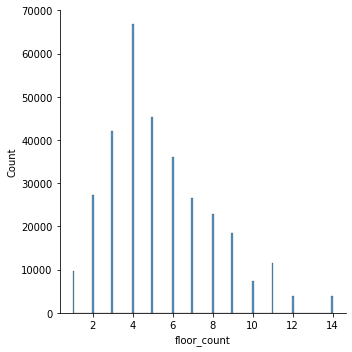

meter
Mean:  0.0
Median:  0.0
Mode:  0    0
dtype: int64
STD:  0.0
Variance:  0.0
Min:  0
Max:  0



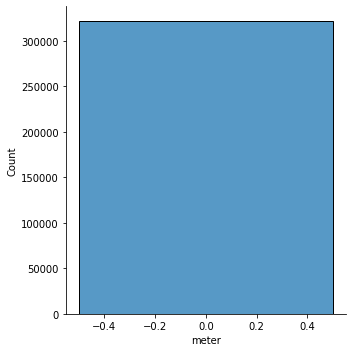

meter_reading
Mean:  179.57085982693454
Median:  68.9837
Mode:  0    4.0
dtype: float64
STD:  286.3615707301989
Variance:  82002.94919106668
Min:  0.0
Max:  2293.88



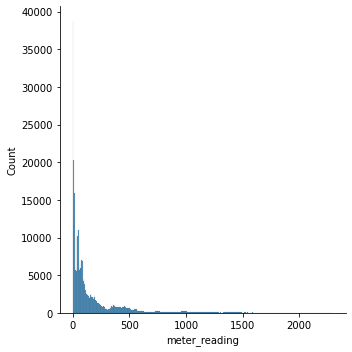

air_temperature
Mean:  15.72429132683509
Median:  15.6
Mode:  0    15.6
dtype: float64
STD:  4.841540216826166
Variance:  23.44051167114516
Min:  1.1
Max:  35.0



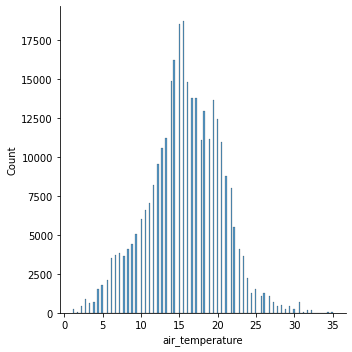

cloud_coverage
Mean:  1.8506937537298587
Median:  2.0
Mode:  0    2.0
dtype: float64
STD:  1.3546869735603344
Variance:  1.8351767963340584
Min:  0.0
Max:  9.0



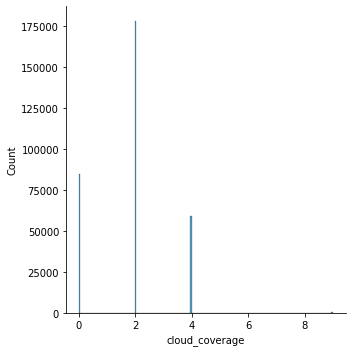

dew_temperature
Mean:  9.50483607270738
Median:  10.6
Mode:  0    11.1
dtype: float64
STD:  4.047033746649912
Variance:  16.37848214652322
Min:  -9.4
Max:  17.8



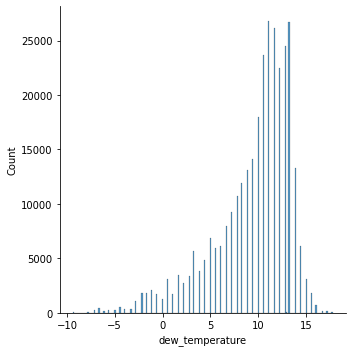

precip_depth_1_hr
Mean:  -0.000602993833300179
Median:  0.0
Mode:  0    0.0
dtype: float64
STD:  0.16252179843896025
Variance:  0.026413334967834025
Min:  -1.0
Max:  8.0



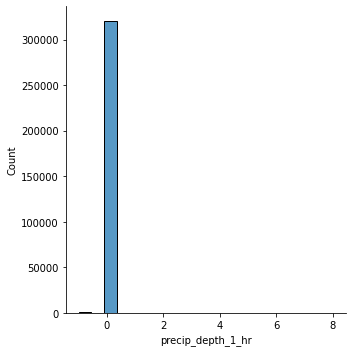

sea_level_pressure
Mean:  1017.1226228366817
Median:  1016.6
Mode:  0    1014.8
dtype: float64
STD:  4.586045105323483
Variance:  21.031809708061477
Min:  1007.8
Max:  1031.7



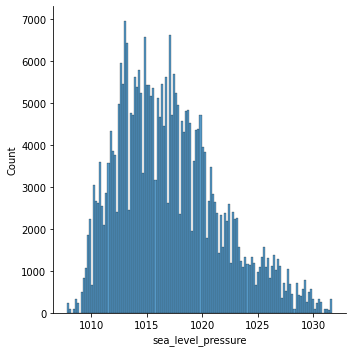

wind_direction
Mean:  215.19302019096878
Median:  270.0
Mode:  0    0.0
dtype: float64
STD:  116.22235325975264
Variance:  13507.635397234733
Min:  0.0
Max:  360.0



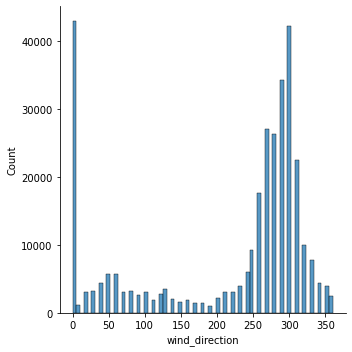

wind_speed
Mean:  3.881576051820173
Median:  3.6
Mode:  0    0.0
dtype: float64
STD:  2.600553983364019
Variance:  6.762881020390467
Min:  0.0
Max:  12.9



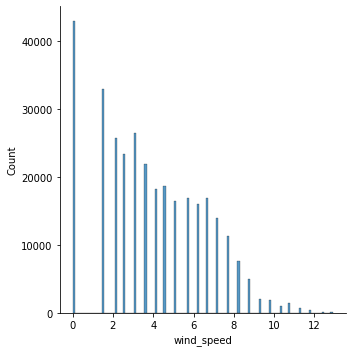

In [ ]:
cols=[  'square_feet', 'year_built',
       'floor_count', 'meter', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed']

aggregate_values(building_train_weather,cols)

### feature engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/content/drive/MyDrive/internship/vpods/ASHRAE/building_train_weather.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(3)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,4,565,Education,15326,1954.0,2.0,0,2016-01-01 01:00:00,8.500,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
1,4,566,Education,2010,1957.0,1.0,0,2016-01-01 01:00:00,0.521,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
2,4,569,Education,86091,1964.0,8.0,0,2016-01-01 01:00:00,243.500,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321728 entries, 0 to 321727
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             321728 non-null  int64  
 1   building_id         321728 non-null  int64  
 2   primary_use         321728 non-null  object 
 3   square_feet         321728 non-null  int64  
 4   year_built          321728 non-null  float64
 5   floor_count         321728 non-null  float64
 6   meter               321728 non-null  int64  
 7   timestamp           321728 non-null  object 
 8   meter_reading       321728 non-null  float64
 9   air_temperature     321728 non-null  float64
 10  cloud_coverage      321728 non-null  float64
 11  dew_temperature     321728 non-null  float64
 12  precip_depth_1_hr   321728 non-null  float64
 13  sea_level_pressure  321728 non-null  float64
 14  wind_direction      321728 non-null  float64
 15  wind_speed          321728 non-nul

In [4]:
cols=['building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed']
print("Cardinality: \n")
for i in cols:
  print(i)
  print("Number of unique categorical features: ",len(data[i].unique()))
  print("feature: ",data[i].unique())
  print("\n")

Cardinality: 

building_id
Number of unique categorical features:  89
feature:  [565 566 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584
 585 586 587 588 589 590 592 594 595 596 597 598 599 600 601 602 603 605
 606 608 609 610 611 612 614 615 616 617 618 619 620 622 623 624 625 626
 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 643 644 645
 646 648 649 650 651 652 653 654 655 593 613 647 607 568 567 621 591]


primary_use
Number of unique categorical features:  7
feature:  ['Education' 'Technology/science' 'Lodging/residential' 'Public services'
 'Entertainment/public assembly' 'Utility' 'Parking']


square_feet
Number of unique categorical features:  89
feature:  [ 15326   2010  86091 193202  47954  94175  23815  56343  33167  86465
 113589  71994   7781 104016  23012  14542 206054 137806 132394 166514
  53234  21866 305268   8516 120694 177281 270413  18474 189425  68701
  25996  44182  11910 238065  29063  51020  23432 124197 141461  30160
 128126  7705

[]

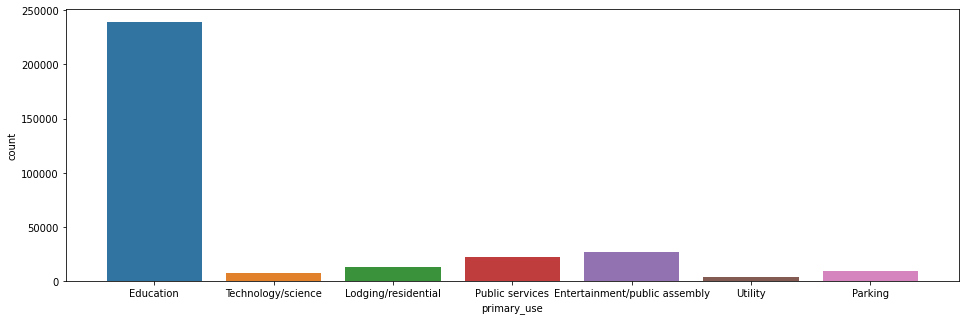

In [5]:
plt.figure(figsize=(16,5))
sns.countplot(data['primary_use'])
plt.plot()

In [6]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['primary_use']=le.fit_transform(data['primary_use'])
print(le.classes_)


['Education' 'Entertainment/public assembly' 'Lodging/residential'
 'Parking' 'Public services' 'Technology/science' 'Utility']


site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

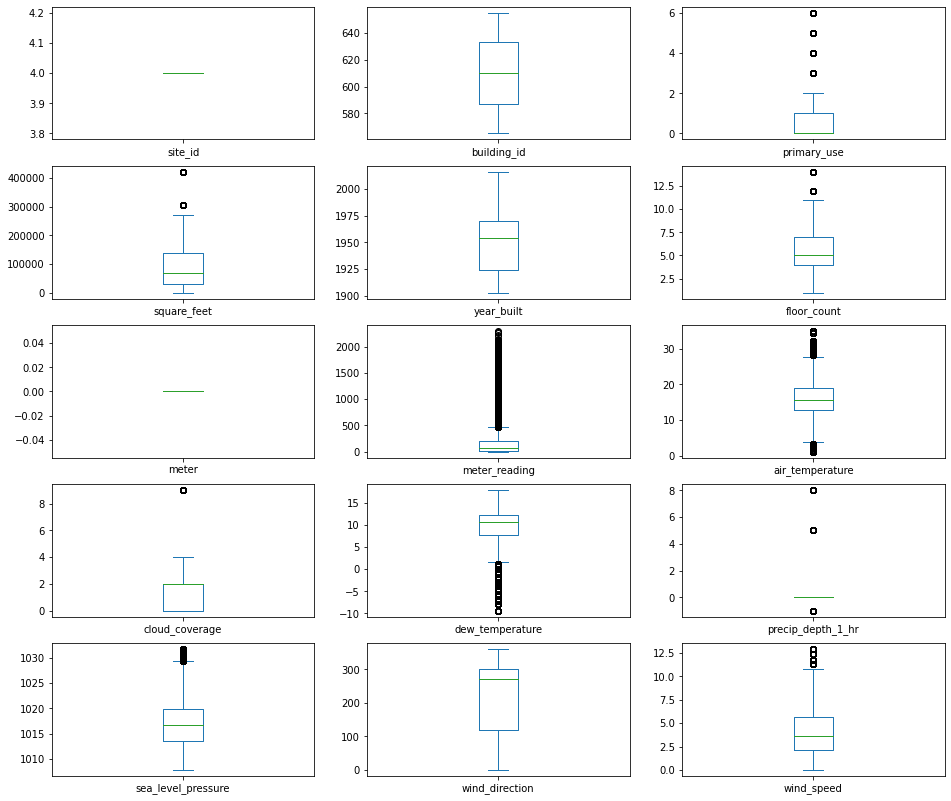

In [7]:
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(16,20))

In [8]:
data.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

In [9]:
import numpy as np
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df[col]=np.clip(df[col],lower_bound,upper_bound)
    return df

def out_all(df,col_list):
    for c in col_list:
        df=remove_outliers(df,c)
    return df
    

site_id                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
building_id           AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
primary_use           AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
square_feet              AxesSubplot(0.125,0.677439;0.227941x0.0920732)
year_built            AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
floor_count           AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
meter                    AxesSubplot(0.125,0.566951;0.227941x0.0920732)
meter_reading         AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
air_temperature       AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
cloud_coverage           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dew_temperature       AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
precip_depth_1_hr     AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
sea_level_pressure       AxesSubplot(0.125,0.345976;0.227941x0.0920732)
wind_direction        AxesSubplot(0.398529,0.345976;0.227941x0.0

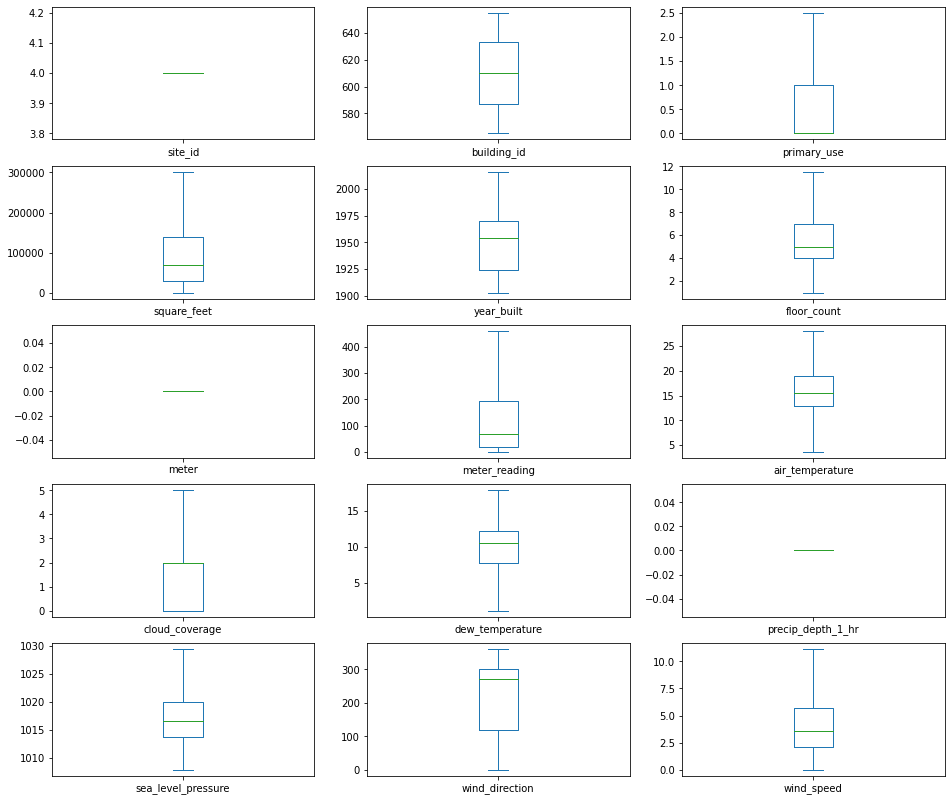

In [10]:
cols=[ 'primary_use', 'square_feet', 
       'floor_count',  'meter_reading', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure',  'wind_speed']
data=out_all(data,cols)
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(16,20))

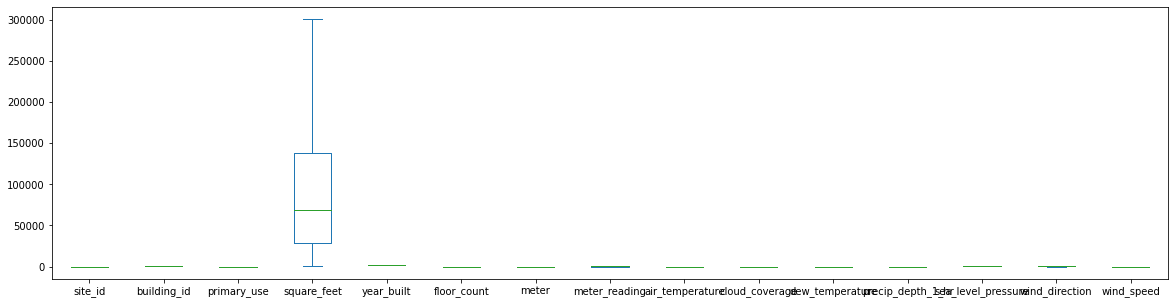

In [11]:
#feature scaling
data.plot(kind='box',figsize=(20,5))

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['timestamp','meter_reading'],axis=1),data[['meter_reading']],test_size=0.33)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_train=StandardScaler()
X_train=scaler_train.fit_transform(X_train)
scaler_test=StandardScaler()
X_test=scaler_test.fit_transform(X_test)


In [14]:
a=pd.DataFrame(X_train)

In [15]:
colm=data.drop(['timestamp','meter_reading'],axis=1).columns
X_train=pd.DataFrame(X_train)
X_train.columns=colm
X_test=pd.DataFrame(X_test)
X_test.columns=colm

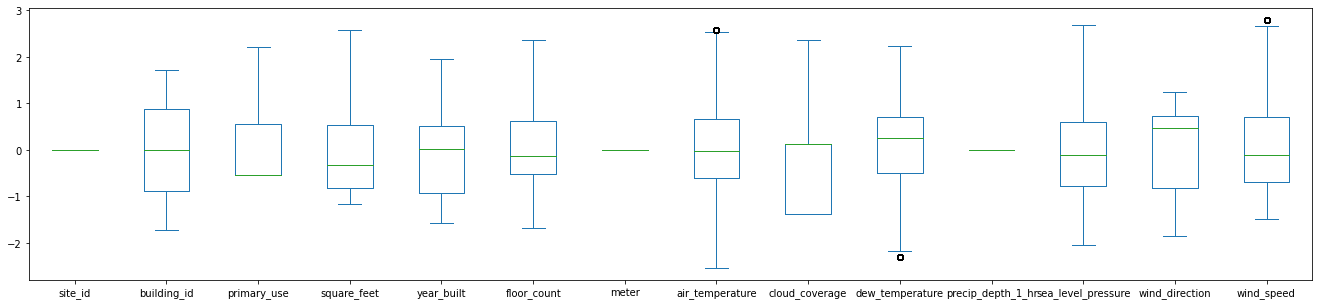

In [16]:
X_train.plot(kind='box',figsize=(23,5))


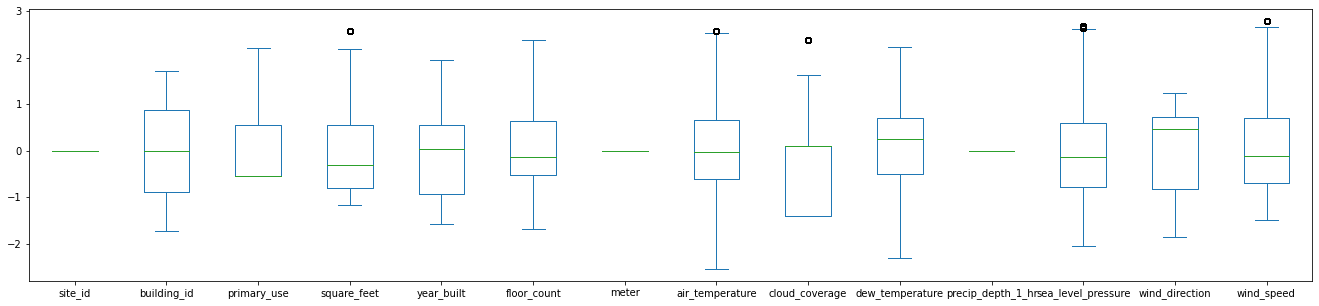

In [17]:
X_test.plot(kind='box',figsize=(23,5))


### feature importance


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()


In [19]:
rf.feature_importances_[sort]

array([0.        , 0.        , 0.        , 0.00230226, 0.00711903,
       0.00743344, 0.00801869, 0.00810901, 0.01124137, 0.01964716,
       0.03207624, 0.11173736, 0.18088694, 0.61142849])

In [20]:
X_train.columns[sort]

Index(['site_id', 'meter', 'precip_depth_1_hr', 'cloud_coverage',
       'wind_direction', 'wind_speed', 'air_temperature', 'dew_temperature',
       'sea_level_pressure', 'primary_use', 'building_id', 'year_built',
       'square_feet', 'floor_count'],
      dtype='object')

[]

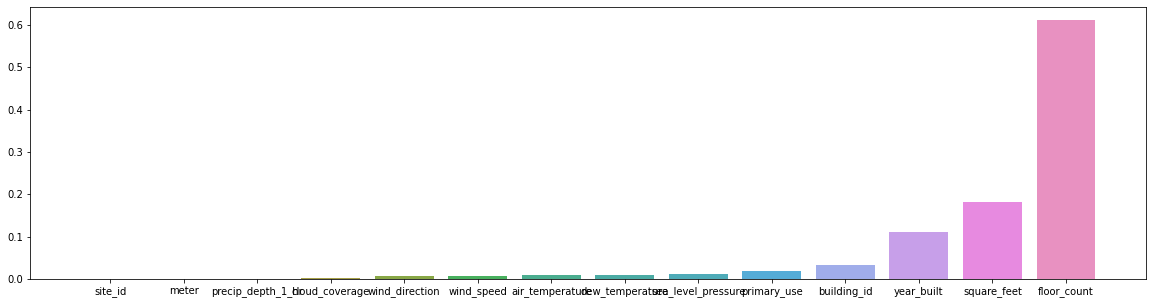

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(X_train.columns[sort],rf.feature_importances_[sort])
plt.plot()

mutual info regression

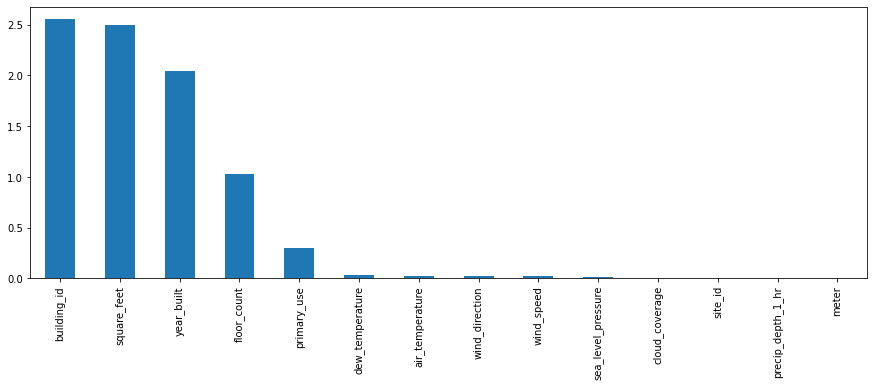

In [22]:
from sklearn.feature_selection import mutual_info_regression

mutual_info=mutual_info_regression(X_train,y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [23]:
from sklearn.feature_selection import f_regression
f_r=f_regression(X_train,y_train)
f_r

(array([           nan, 3.45624744e+03, 6.18722197e+03, 1.34174723e+05,
        3.28683954e+04, 2.16858628e+05,            nan, 1.73603466e+02,
        3.28762833e+01, 1.65891985e+01,            nan, 3.59746786e+01,
        2.71743073e+02, 3.73550233e+02]),
 array([           nan, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan, 1.25177772e-39,
        9.83447636e-09, 4.64311843e-05,            nan, 2.00215206e-09,
        5.15769007e-61, 3.71353734e-83]))

Text(0.5, 1.0, 'f_score')

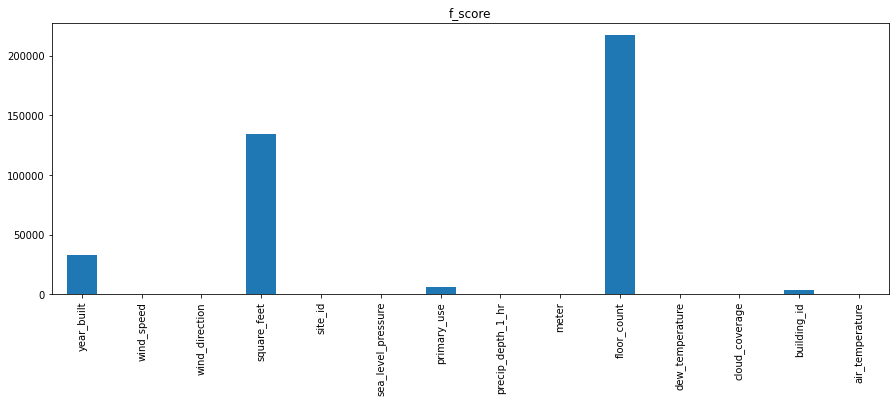

In [24]:
f_r=pd.Series(f_r[0])
f_r.index=X_train.columns
f_r.sort_index(ascending=False).plot.bar(figsize=(15,5))
plt.title("f_score")

Text(0.5, 1.0, 'p_value')

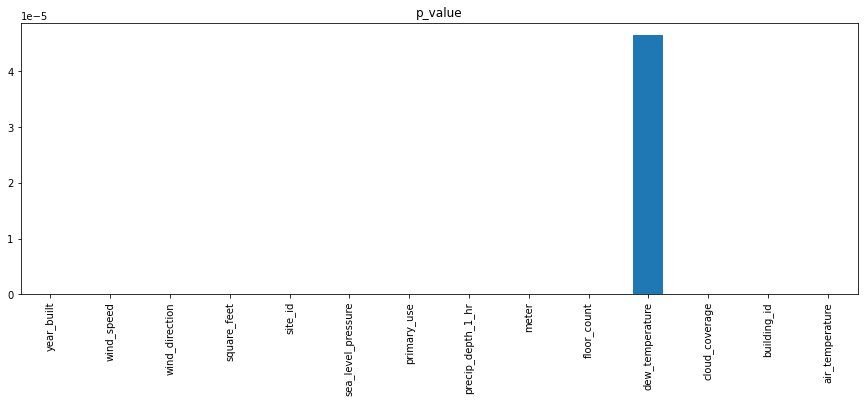

In [25]:
pv=f_regression(X_train,y_train)
pv=pd.Series(pv[1])
pv.index=X_train.columns
pv.sort_index(ascending=False).plot.bar(figsize=(15,5))
plt.title("p_value")

In [26]:
X_train.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'meter', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [27]:
features_selected=[ 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 
       'dew_temperature',  'sea_level_pressure',
       'wind_direction', 'wind_speed']

X_train=X_train[features_selected]
X_test=X_test[features_selected]

In [28]:
print("features: ",X_train.columns)
print()
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print('y_train shape: ',y_train.shape)
print("y_test shape: ",y_test.shape)



features:  Index(['building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 'dew_temperature',
       'sea_level_pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

X_train shape:  (215557, 10)
X_test shape:  (106171, 10)
y_train shape:  (215557, 1)
y_test shape:  (106171, 1)


### Regression models

In [29]:
from sklearn import metrics
def get_error(model,X_train,X_test,y_train,y_test,pt=False):
  y_pred=model.predict(X_test)
  mae=metrics.mean_absolute_error(y_pred,y_pred)
  mse=metrics.mean_squared_error(y_pred,y_test)
  r2=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
  if pt==True:
    print("Mean Absolute error: ",mae)
    print("Mean Squared error: ",mse)
    print("R2 error: ",r2)
  return mae,mse,r2

In [30]:
len(X_train),len(X_test)

(215557, 106171)

In [31]:
X_train=X_train.iloc[:5000,:]
y_train=y_train.iloc[:5000,:]
X_test=X_test.iloc[:1000,:]
y_test=y_test.iloc[:1000,:]

In [32]:

results=pd.DataFrame(columns=['model','Mean Absolute error','Mean Squared error','R2 error'])


In [33]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
mae,mse,r2=get_error(lr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Linear Regression','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  10333.153320980284
R2 error:  101.65211911701735


In [34]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)
mae,mse,r2=get_error(svr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Support vector regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  13459.7302679797
R2 error:  116.01607762711038


In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
mae,mse,r2=get_error(dtr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Decision Tree Regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  1780.1635947797442
R2 error:  42.191984958991256


In [36]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
mae,mse,r2=get_error(rfr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Random forest regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  1148.7783376418236
R2 error:  33.893632700579964


In [37]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(X_train,y_train)
mae,mse,r2=get_error(knnr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'KNN regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  3814.0872275931993
R2 error:  61.75829683203059


In [38]:
reg_1=LinearRegression()
reg_2=RandomForestRegressor(n_estimators=10, random_state=1)
reg_3=KNeighborsRegressor()

from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lr', reg_1), ('rf', reg_2), ('knn', reg_3)])
er.fit(X_train,y_train)
mae,mse,r2=get_error(er,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Voting Regressor (lr,rf,knn)','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  3067.253477325232
R2 error:  55.38279044364984


In [39]:
reg_1=SVR(kernel = 'rbf')
reg_2=LinearRegression()
reg_3=DecisionTreeRegressor()

from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lr', reg_1), ('rf', reg_2), ('knn', reg_3)])
er.fit(X_train,y_train)
mae,mse,r2=get_error(er,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Voting Regressor (svr,lr,dtc)','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  5397.521187899782
R2 error:  73.46782416745293


In [40]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=SVR(),
                    n_estimators=10, random_state=0)
regr.fit(X_train,y_train)
mae,mse,r2=get_error(regr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Bagging regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  13396.593845564317
R2 error:  115.74365574650007


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train,y_train)
mae,mse,r2=get_error(gbr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'GBR','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  1293.0180497023368
R2 error:  35.95856017282028


In [42]:
from sklearn.ensemble import AdaBoostRegressor
adar = AdaBoostRegressor(random_state=0, n_estimators=100)
adar.fit(X_train,y_train)
mae,mse,r2=get_error(adar,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Adaboosting','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
results=results.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  4790.268421151071
R2 error:  69.21176504866114


[]

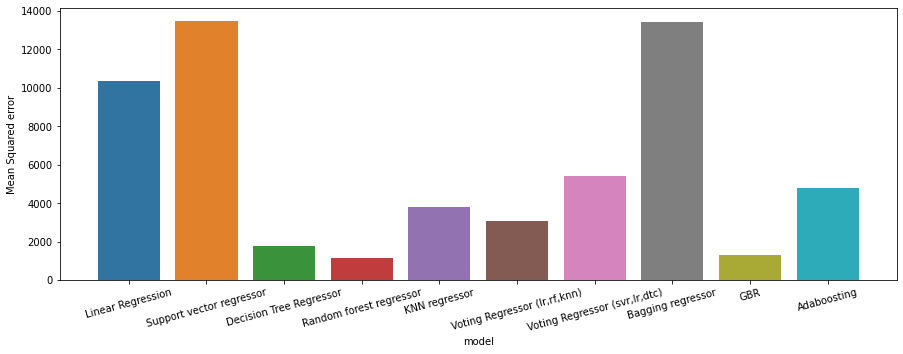

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x=results['model'],y=results['Mean Squared error'])
plt.xticks(rotation=15)
plt.plot()

In [44]:
results

,model,Mean Absolute error,Mean Squared error,R2 error
0,Linear Regression,0.0,10333.153321,101.652119
1,Support vector regressor,0.0,13459.730268,116.016078
2,Decision Tree Regressor,0.0,1780.163595,42.191985
3,Random forest regressor,0.0,1148.778338,33.893633
4,KNN regressor,0.0,3814.087228,61.758297
5,"Voting Regressor (lr,rf,knn)",0.0,3067.253477,55.382790
6,"Voting Regressor (svr,lr,dtc)",0.0,5397.521188,73.467824
7,Bagging regressor,0.0,13396.593846,115.743656
8,GBR,0.0,1293.018050,35.958560
9,Adaboosting,0.0,4790.268421,69.211765


### Hyperparameter tuning

linear regression


In [51]:
hyper_parameter_tuning_result=pd.DataFrame(columns=['model','Mean Absolute error','Mean Squared error','R2 error'])


In [49]:
from sklearn.model_selection import GridSearchCV
model=LinearRegression()
parameters={'fit_intercept':[True,False],
            'normalize':[True,False],
            'positive':[True,False]
            }

grid_search=GridSearchCV(
    model,
    parameters,
    scoring='r2'
    )

In [50]:
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'fit_intercept': True, 'normalize': True, 'positive': False}
Best Score:  0.5733657124734413


In [52]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True,normalize=True,positive=False)
lr.fit(X_train,y_train)
mae,mse,r2=get_error(lr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Linear Regression','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
hyper_parameter_tuning_result=hyper_parameter_tuning_result.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  10333.153320980282
R2 error:  101.65211911701734


support vector regressor

In [56]:
model=SVR()
parameters={'kernel':['linear', 'poly', 'rbf'],
            'degree':[2,3,4,5],
            'gamma':['auto','scale']
            }

grid_search=GridSearchCV(
    model,
    parameters,
    scoring='r2'
    )
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
Best Score:  0.564262199240504


In [57]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',degree=2,gamma='auto')
svr.fit(X_train,y_train)
mae,mse,r2=get_error(svr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Support vector regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
hyper_parameter_tuning_result=hyper_parameter_tuning_result.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  10481.684982151402
R2 error:  102.3801005183693


Decision tree regressor

In [63]:
model=DecisionTreeRegressor()
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
            'splitter':['best','random'],
            'max_features':['auto','scale','log2','None']
            }

grid_search=GridSearchCV(
    model,
    parameters,
    scoring='r2'
    )
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}
Best Score:  0.9278906152103001


In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion= 'friedman_mse', max_features= 'auto', splitter= 'best')
dtr.fit(X_train,y_train)
mae,mse,r2=get_error(dtr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Decision Tree Regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
hyper_parameter_tuning_result=hyper_parameter_tuning_result.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  1793.7049341749841
R2 error:  42.35215383159378


random forest regressor

In [66]:
model=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,120,130,150],
            'criterion':['squared_error',  'absolute_error','poisson'],
            'max_features':['scale','log2','None']
            }

grid_search=GridSearchCV(
    model,
    parameters,
    scoring='r2'
    )
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 80}
Best Score:  0.9586450687234643


In [67]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(criterion= 'squared_error', max_features= 'log2',n_estimators = 80)
rfr.fit(X_train,y_train)
mae,mse,r2=get_error(rfr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'Random forest regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
hyper_parameter_tuning_result=hyper_parameter_tuning_result.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  1057.514332486821
R2 error:  32.51944545171121


KNNr

In [68]:
model=KNeighborsRegressor()
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree', 'kd_tree', 'brute']
            }

grid_search=GridSearchCV(
    model,
    parameters,
    scoring='r2'
    )
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
Best Score:  0.8577292911007615


In [69]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(algorithm= 'auto', n_neighbors= 6, weights= 'distance')
knnr.fit(X_train,y_train)
mae,mse,r2=get_error(knnr,X_train,X_test,y_train,y_test,pt=True)
mv={'model':'KNN regressor','Mean Absolute error':mae,'Mean Squared error':mse,'R2 error':r2}
hyper_parameter_tuning_result=hyper_parameter_tuning_result.append(mv,ignore_index=True)

Mean Absolute error:  0.0
Mean Squared error:  3582.449881664264
R2 error:  59.85357033347521


In [70]:
hyper_parameter_tuning_result

,model,Mean Absolute error,Mean Squared error,R2 error
0,Linear Regression,0.0,10333.153321,101.652119
1,Decision Tree Regressor,0.0,1793.704934,42.352154
2,Random forest regressor,0.0,1057.514332,32.519445
3,KNN regressor,0.0,3582.449882,59.853570


[]

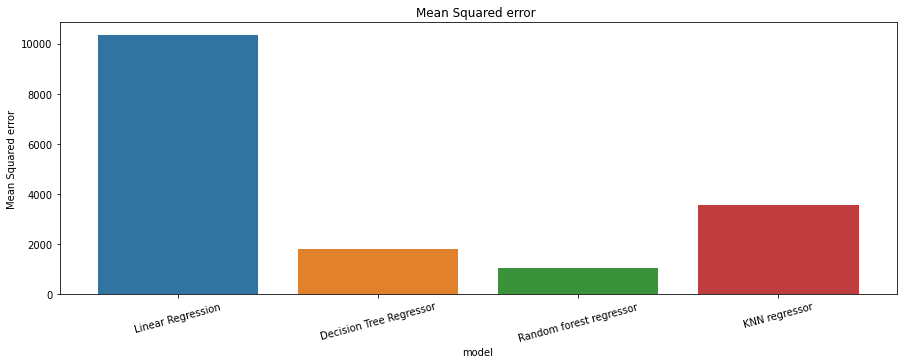

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x=hyper_parameter_tuning_result['model'],y=hyper_parameter_tuning_result['Mean Squared error'])
plt.xticks(rotation=15)
plt.title("Mean Squared error ")
plt.plot()

[]

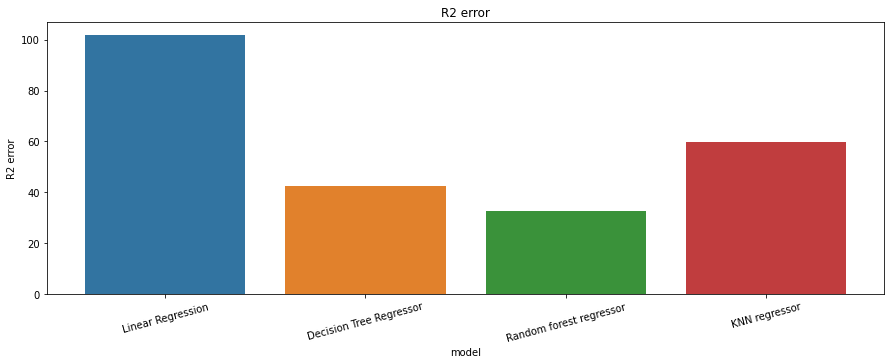

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x=hyper_parameter_tuning_result['model'],y=hyper_parameter_tuning_result['R2 error'])
plt.xticks(rotation=15)
plt.title("R2 error")
plt.plot()